<a href="https://colab.research.google.com/github/RtjShreyD/CV-DL/blob/master/CV_basic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import imutils
import cv2
from google.colab.patches import cv2_imshow

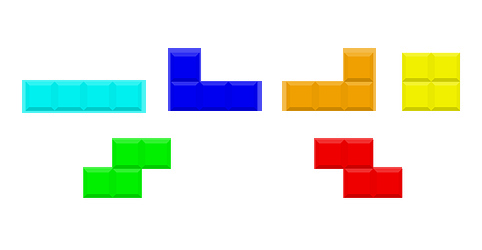

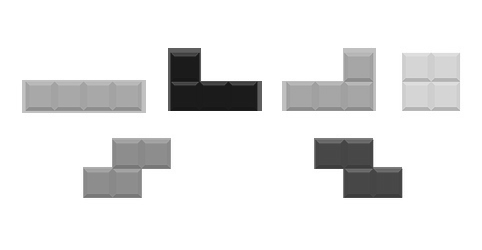

-1

In [0]:
image = cv2.imread("tetris_blocks.png")
cv2_imshow(image)
cv2.waitKey(0)
 
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv2.waitKey(0)

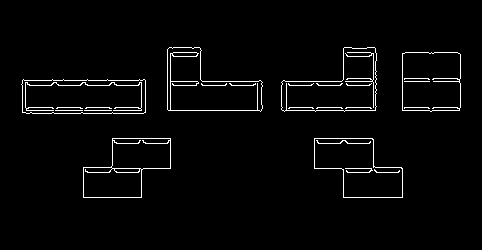

-1

In [0]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)
cv2_imshow( edged)
cv2.waitKey(0)

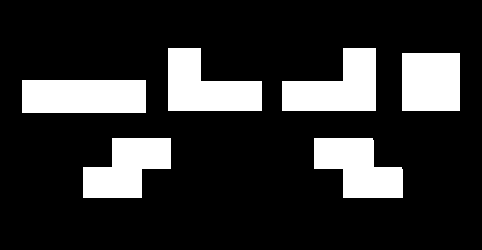

-1

In [0]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)
cv2.waitKey(0)

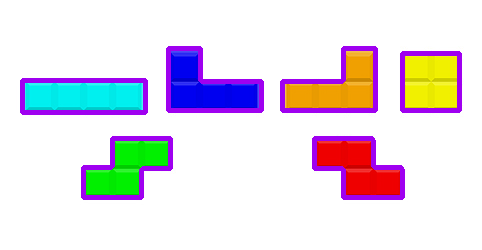

-1

In [0]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours all at once
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
 
cv2_imshow(output)
cv2.waitKey(0)

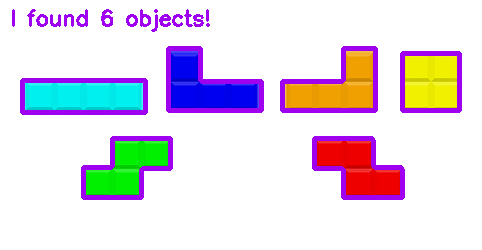

-1

In [0]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)
cv2.waitKey(0)

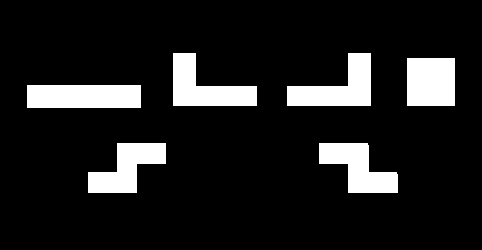

-1

In [0]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2_imshow(mask)
cv2.waitKey(0)

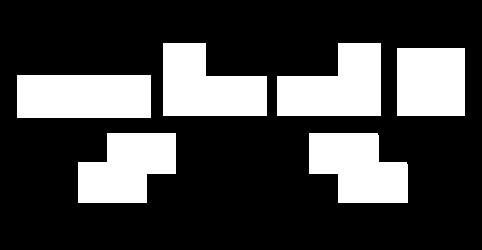

-1

In [0]:
# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)
cv2.waitKey(0)

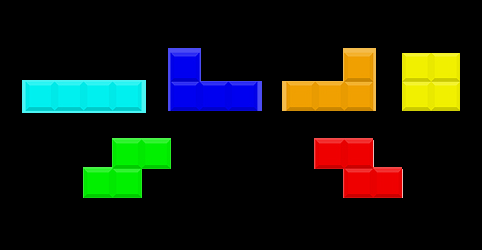

-1

In [0]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)
cv2.waitKey(0)